# L10: Resampling methods

**Sources and additional reading:**
- Efron & Gong, [A leisurely look at the Bootstrap, the Jackknife, and Cross-validation](https://www.jstor.org/stable/2685844)
- Lupton, chapter 6
- [Statisticelle blog post](https://statisticelle.com/resampling-the-jackknife-and-pseudo-observations/)
- Efron & Tibshirani, An introduction to the bootstrap (especially figures)
- image credit: https://online.stat.psu.edu/stat555/node/119/

## Error estimation

In the course of these lectures, our main focus has always been to estimate values of model parameters and their distribution (or uncertainties) given some set of observational data. We have seen that we can obtain analytic estimates of the variance of our estimator (e.g. mean of Gaussian random variables, linear least squares), we can approximate variances (MLE) and in the case of full Bayesian inference, we can always resort to MCMCs to estimate the posterior and thus parameter uncertainties.

But what do we do for example if we do not know the likelihood? Can we still estimate uncertainties for our estimators?

The goal of resampling methods is to use the data itself to learn its distribution and thus the distribution of any estimator derived from it. This is analogous to the fact that we can use an iid sample of length $n$ to estimate both the mean $\hat{\mu}$ and its standard deviation $\sigma(\hat{\mu})=\frac{\hat{\sigma}}{n}$. Resampling methods just generalize this notion and the two most popular ones are the *Jackknife* and the *Bootstrap*.

The main idea of these methods is to create hypothetical samples from the observed data itself. Each of these hypothetical samples can then be analyzed in the same way as the true data, which allows us to study how e.g. the value of an estimator depends on random variations in the observations. Crucially these resampling techniques preserve the properties of the true underlying distributions.

Below you can find an illustration of the basic idea behind resampling (here illustrated using the Bootstrap as an example):

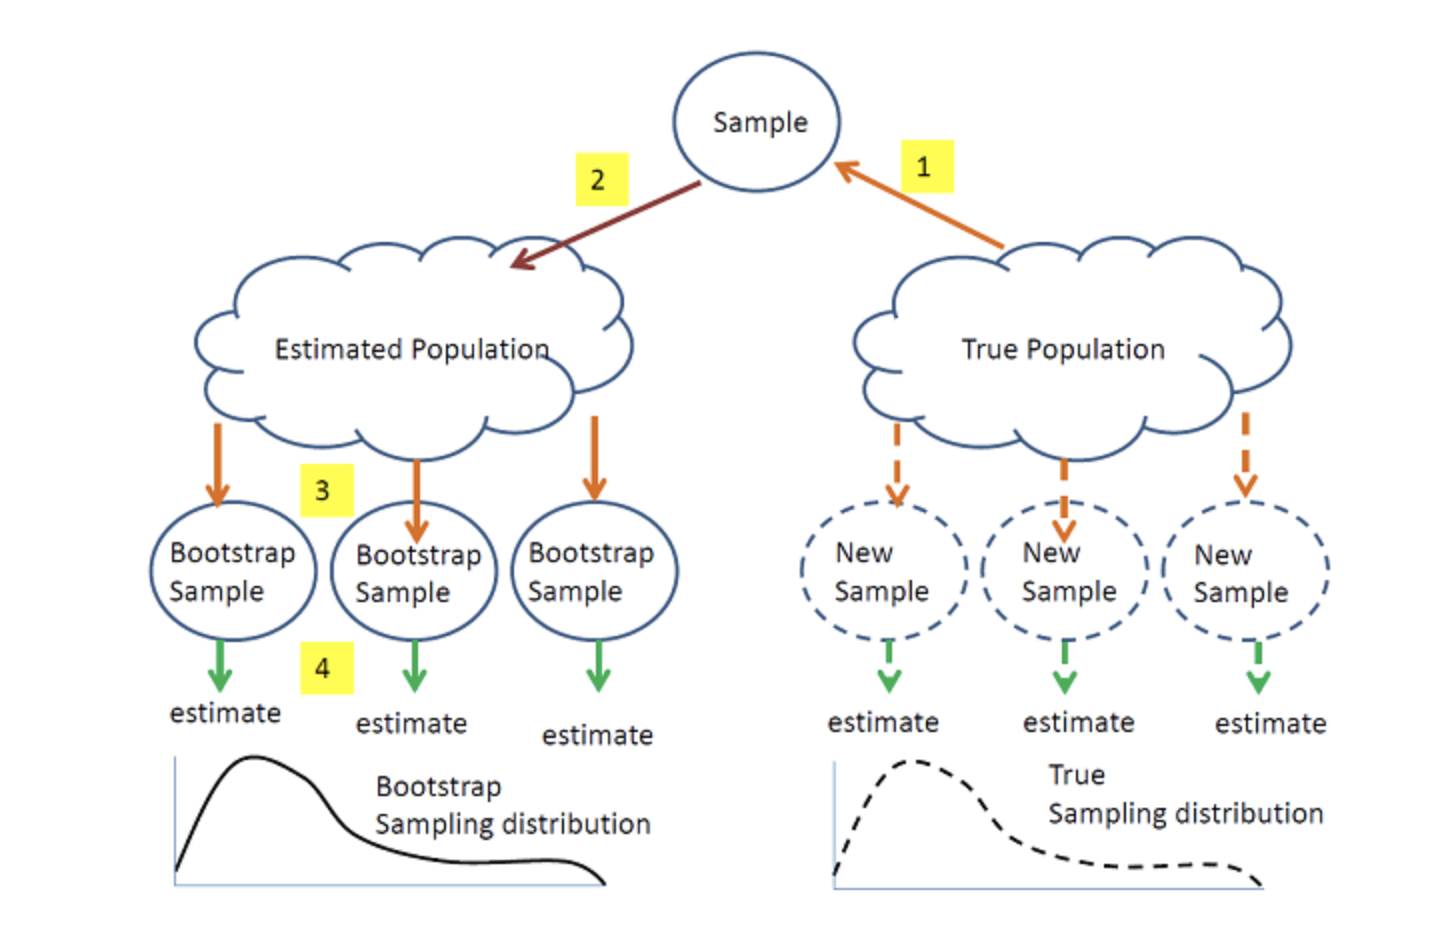

Now that we understand the general principle of resampling, let us look at the *Jackknife* and the *Bootstrap* in more detail.

## Setup

Let us assume that the data consists of an iid random sample of size $n$ drawn from an underlying unknown probability distribution $F$ on $\mathbb{R}$, i.e. $$x_1, ..., x_n \sim F.$$ We can use these data to estimate the value of a model parameter $\theta$ using an estimator $\hat{\theta}(x_1,..., x_n)$. 

We would now like to estimate the variance as well as potential bias of this estimator without having to specify anything else about the estimator or its distribution. 

## The Jackknife

The jackknife method ([Quenouille, 1948](https://www.jstor.org/stable/2983696), [Tukey, 1958](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-29/issue-2/Abstracts-of-Papers/10.1214/aoms/1177706647.full)) is based on the notion of *jackknife samples*. A jackknife sample, $\boldsymbol{x}_i$, is a subsample of the original data that leaves out one observation at the time, i.e. $$\boldsymbol{x}_i=(x_1,\cdots,x_{i-1}, x_{i+1},\cdots, x_n), $$ for $i = 1, \cdots, n$. This procedure leads to $n$ samples of length $n-1$. The jackknife replication corresponding to each of these samples is defined as the value of the estimator $\hat{\theta}$ computed from the jackknife sample, and is denoted by $$\hat{\theta}_{(i)}=\hat{\theta}(x_1,...,x_{i-1}, x_{i+1},..., x_n).$$ Thus $\hat{\theta}_{(i)}$ denotes the value of the estimator using the jackknife sample from which $x_i$ has been removed. 

The jackknife estimate of the standard deviation of $\hat{\theta}(x_1,..., x_n)$ is defined as $$\hat{\sigma}_J=\left[\frac{n-1}{n}\sum_{i=1}^{n}\left(\hat{\theta}_{(i)}-\hat{\theta}_{(.)}\right)^2\right]^{1/2},$$ where $\hat{\theta}_{(.)}=\frac{1}{n}\sum_{i=1}^{n}\hat{\theta}_{(i)}$ denotes the mean of the jackknife replications. Thus the jackknife method estimates the variance of the estimator $\theta$ as a rescaled version of the variance of the leave-one-out jackknife replications. Essentially, you can think of the $\frac{n-1}{n}$ factor as a rescaling of the variance to account for the fact that the jackknife estimates are similar and correlated and thus their spread underestimates the true variance of the estimator. This expression is very general as it can be applied to any statistic that is a function of $n$ iids.

In addition to the variance, we can also use jackknife resampling to estimate the bias $b$ of a given estimator.  In general the bias of an estimator is defined as $$b(\hat{\theta})=\langle\hat{\theta}\rangle-\theta, $$ where $\theta$ denotes the true value of the parameter. The jackknife estimate of the bias of the estimator $\hat{\theta}=\hat{\theta}(x_1,,..., x_n)$ is given by $$\hat{b}_{J}=(n-1)(\hat{\theta}_{(.)}-\hat{\theta}),$$ i.e. it is proportional to the difference of the mean of the Jackknife estimates to the estimator evaluated for the full sample.

The usefulness of this bias estimate is that it allows for removing a bias that is proportional to $1/n$. Let us look at why this is the case. We assume that the full sample estimator is biased such that $$\langle\hat{\theta}\rangle=\theta+\frac{b_1(\theta)}{n}+\frac{b_2(\theta)}{n^2}+... .$$ Then we have $$\langle \hat{\theta}_{(.)} \rangle = \frac{1}{n}\sum_{i=1}^{n}\langle\hat{\theta}_{(i)}\rangle = \frac{1}{n}\sum_{i=1}^{n}\left(\theta+\frac{b_1(\theta)}{n-1}+\frac{b_2(\theta)}{(n-1)^2}+...\right).$$ Therefore we obtain $$\langle \hat{\theta}_{(.)}-\hat{\theta} \rangle = \frac{b_1(\theta)}{n(n-1)}+\mathcal{O}(n^{-3}),$$ and we see that the jackknife bias thus provides an estimate of the estimator bias term $\frac{b_1(\theta)}{n}$. Therefore, if an $\mathcal{O}(n^{-1})$ bias term is present, the jacknife estimate will remove it, and thus reduce the remaining bias to $\mathcal{O}(n^{-2})$.

Using this bias estimate, we can define a bias-corrected jackknife estimator through $$\hat{\theta}_{\mathrm{Jack}}=\hat{\theta}-\hat{b}_{J}=n\hat{\theta}-(n-1)\hat{\theta}_{(.)}.$$

## The bootstrap

The bootstrap ([Efron, 1979](https://projecteuclid.org/journals/annals-of-statistics/volume-7/issue-1/Bootstrap-Methods-Another-Look-at-the-Jackknife/10.1214/aos/1176344552.full)) is similar in spirit to the Jackknife but it uses a different approach to create new samples from the original data. The procedure is based on the notion of *bootstrap samples*, which are closely related to the *empirical distribution function*. The *empirical distribution function* $\hat{F}$ is constructed by putting probability mass $\frac{1}{n}$ on each observed data point $x_i$, i.e. $$\hat{F}(x)=\frac{1}{n}\sum_i\delta(x-x_i).$$

### Example for empirical distribution function

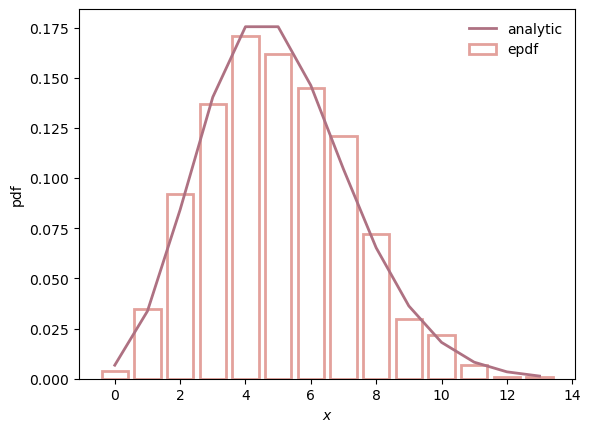

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

npoints = 1000
mu = 5

data = np.random.poisson(mu, size=npoints)

occur = np.bincount(data, weights=1./npoints*np.ones_like(data))

x = np.arange(data.max()+1)
plt.bar(x, occur, edgecolor='#e3a19c', color='None', linewidth=2, label=r'epdf')
plt.plot(x, scipy.stats.poisson.pmf(x, mu), color='#AE7182', linewidth=2, label=r'analytic')
plt.xlabel(r'$x$')
plt.ylabel(r'pdf')
plt.legend(frameon=False)

A bootstrap sample of the original data, denoted $x_1^*, ..., x_n^*$, is defined as a random sample of size $n$ drawn from the empirical distribution function, i.e. $$x_1^*, ..., x_n^* \sim \hat{F},$$ where $*$ denotes a randomized or resampled version of the original data $x_1, ..., x_n$. In other words, each $x_i^*$ is drawn independently and with replacement from the inital sample $x_1, ..., x_n$.

For each bootstrap sample and estimator $\hat{\theta}$, we can define a corresponding bootstrap replication of $\hat{\theta}$ as $$\hat{\theta}^* = \hat{\theta}(x_1^*, ..., x_n^*),$$ i.e. $\hat{\theta}^*$ is obtained by evaluating $\hat{\theta}$ on the bootstrap sample.

The bootstrap estimate of variance is based on the idea that if we know $F$, then the standard deviation of our estimator $\theta$ can be computed as $$\sigma(F)=\left[\underset{F}{\mathrm{var}}\;\hat{\theta}(x_1, ..., x_n)\right]^{1/2}.$$ Now in real life, we do not have access to $F$, but the next best thing we have is $\hat{F}$. In analogy to the procedure if we had access to $F$, we define the bootstrap estimate of the standard deviation as $$\sigma_B=\sigma(\hat{F})=\left[\underset{\hat{F}}{\mathrm{var}}\;\hat{\theta}^*(x_1^*, ..., x_n^*)\right]^{1/2},$$ where $\hat{\theta}^*(x_1^*, ..., x_n^*)$ denotes the estimate of $\theta$ obtained for the bootstrap sample. Therefore, the bootstrap approximates the variance of an estimator as the variance of the bootstrap replications.

In practice, it is usually not possible to estimate $\sigma_B=\sigma(\hat{F})$ analytically, and we thus have to resort to Monte Carlo methods. Specifically, the bootstrap algorithm proceeds as follows:

1. Generate a number of $B$ bootstrap samples $x_1^*, ..., x_n^*$ of length $n$ by drawing with replacement from the original data $x_1, ..., x_n$.
2. For each bootstrap sample $b$, compute the corresponding replication $\hat{\theta}^{*b}(x_1^*, ..., x_n^*)$, $b=1,\cdots, B$.
2. Compute $$\hat{\sigma}_B=\left[\frac{1}{B-1}\sum_{i=1}^B (\hat{\theta}^{*b}-\hat{\theta}^{*.})^2\right]^{1/2},$$ where $$\hat{\theta}^{*.}=\frac{1}{B}\sum_{i=1}^B \hat{\theta}^{*b},$$ denotes the mean of the $B$ bootstrap estimates.

In the limit of $B\to\infty$, we have that $$\lim_{B\to\infty}\hat{\sigma}_B=\sigma_B$$.

The methodology to estimate the variance of an estimator using the bootstrap is illustrated below.

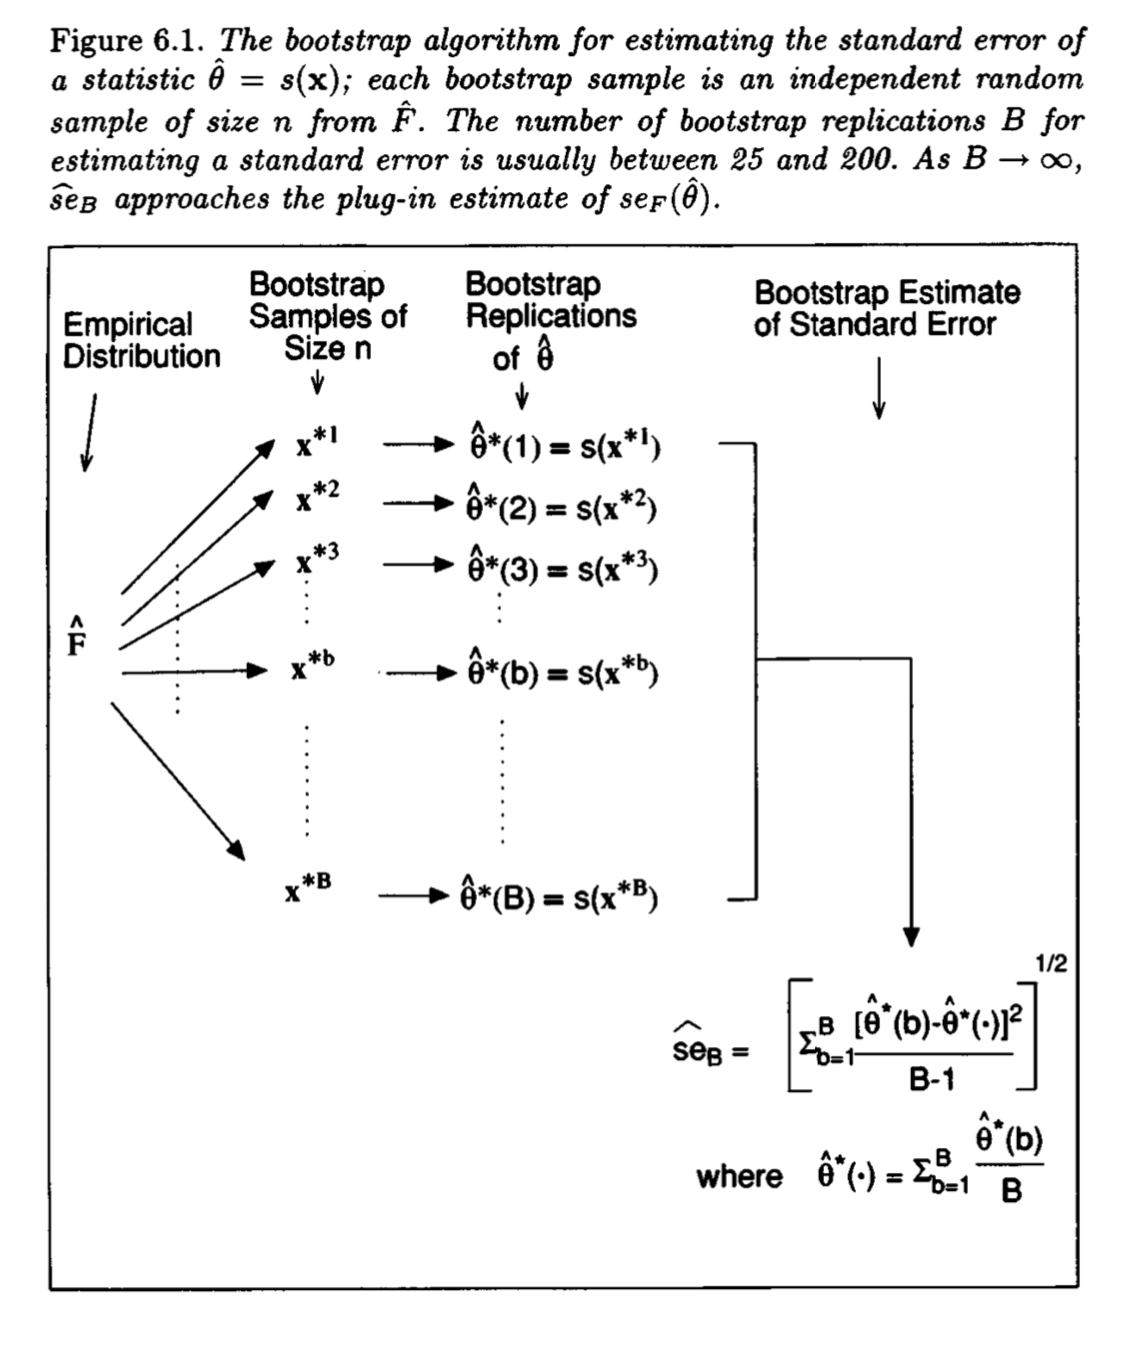

As with the Jackknife, we can also use the bootstrap method to compute the bias of an estimator. To motivate the bias definition for the bootstrap we note that the bias of an estimator can be thought of as a function of the underlying pdf $F$, i.e. $$b(F)=\langle\hat{\theta}(x_1, ..., x_n)-\theta\rangle_F=\langle\hat{\theta}(x_1, ..., x_n)\rangle_F-\theta(F).$$ Analogously, we obtain the bootstrap estimate of the bias by replacing $F$ with $\hat{F}$ as $$b_B=b(\hat{F})=\langle\hat{\theta}(x_1^*, ..., x_n^*)-\theta(\hat{F})\rangle_{\hat{F}}=\langle\hat{\theta}(x_1^*, ..., x_n^*)\rangle_{\hat{F}}-\theta(\hat{F}).$$

As with the variance in practice we usually need to estimate $b_B$ using Monte Carlo methods as follows:
1. Generate a number of $B$ bootstrap samples $x_1^*, ..., x_n^*$ of length $n$ by drawing with replacement from the original data $x_1, ..., x_n$.
2. Estimate the bootstrap expectation value as $$\langle\hat{\theta}(x_1^*, ..., x_n^*)\rangle_{\hat{F}} = \frac{1}{B}\sum_{i=1}^B \hat{\theta}^{*b}.$$ 
3. Compute the bootstrap bias estimate as $$\hat{b}_B=\langle\hat{\theta}(x_1^*, ..., x_n^*)\rangle_{\hat{F}}-\hat{\theta}=\frac{1}{B}\sum_{i=1}^B (\hat{\theta}^{*b}-\hat{\theta}),$$ where $\hat{\theta}$ denotes the estimator evaluated on the original sample. This identity shows that the bias is inherent in how we estimate a given quantity.

As before, we can use this bias bias estimate to obtain an unbiased estimator for $\theta$ through $$\hat{\theta}_{B}=\hat{\theta}-\hat{b}_B.$$

The methodology to estimate the bias of an estimator using the bootstrap is illustrated below.

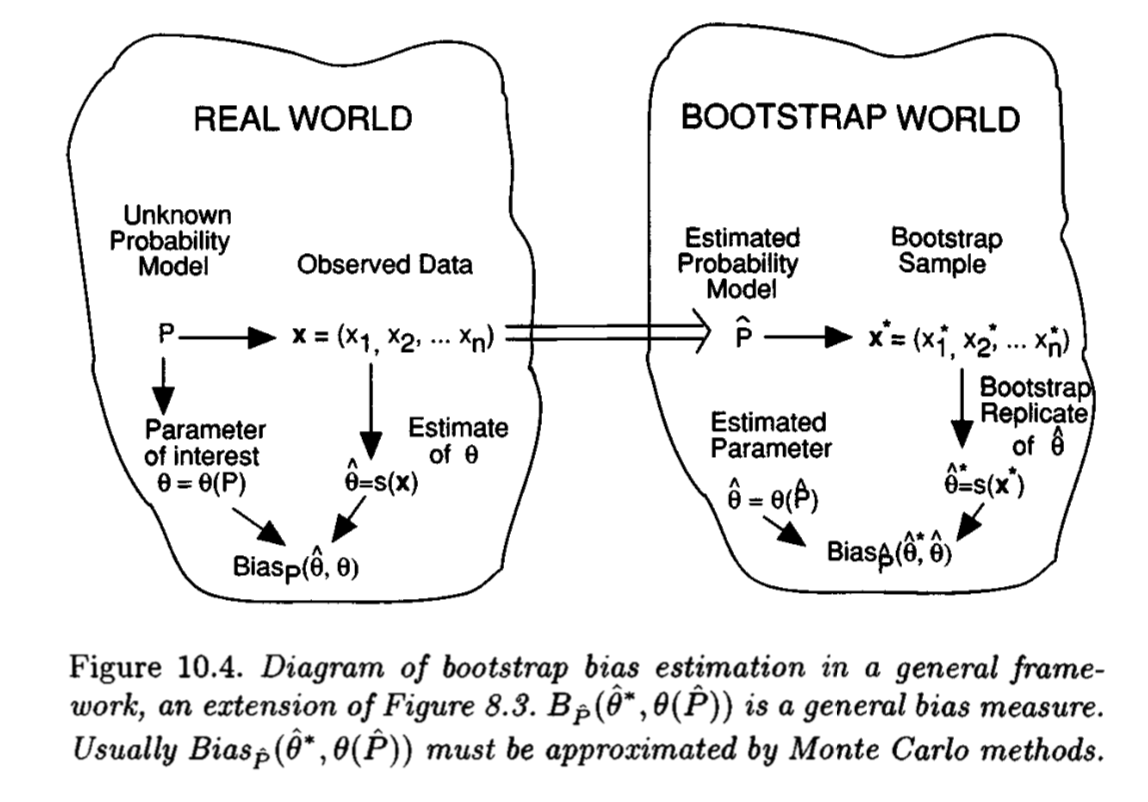

## Why does this work?
- The empirical distribution function is consistent, i.e. $\hat{F}$ converges to $F$ as $n\to \infty$.
- The bootstrap estimates for a given statistic are consistent if their true distribution has a limiting distribution and the mapping from the population distribution function to this distribution is continuous.
- One can show that the jackknife is a linear approximation of the bootstrap.

## Comparison between the jackknife and the bootstrap

### Theoretical considerations:
- The jackknife estimators for variance and bias generally only work well for smooth statistics, where smooth means that a small change in the data only causes a small change in the estimator. An example would be the sample mean. A n example for a non-smooth statistic is the sample median, and we'll see below an example for the failure of the jackknife in this case.
- The bootstrap is applicable to a wider range of problems than the jackknife.

### Practical considerations
- The bootstrap tends to be more computationally expensive, especially for large data sets.
- Jackknife uses (in general) all samples, i.e. no approximation involved, while bootstrap usually only uses a subset of the total samples.

## Example: Failure of jackknife - estimating the variance of the median

Let us look at a classic example in which the jackknife variance estimate fails catastrophically. As we said above, the jackknife tends to fail for non-smooth statistics, an example of one of those is the median. Let us look at what can happen if we try to emply jackknife resampling to estimate the median of a given data set:

In [2]:
data = np.array([4, 6, 8, 1, 6, 7])

median = np.median(data)
print('median = {}.'.format(median))

median = 6.0.


Now try to estimate the variance of the median using the jackknife:

In [3]:
medians_j = np.zeros_like(data)

for i in range(len(data)):
    mask = np.ones_like(data, dtype=bool)
    mask[i] = 0
    data_j = data[mask]
    median_j = np.median(data_j)
    print('median = {}.'.format(median_j))
    medians_j[i] = median_j

median = 6.0.
median = 6.0.
median = 6.0.
median = 6.0.
median = 6.0.
median = 6.0.


As we can see, all the resampled medians give the same answer, implying that a naive jackknife variance estimate would be zero. The jackknife thus fails catastrophically in this case, here because it is not able to generate a diverse enough set of resampled data.

Let us look at what happens if we use the bootstrap:

In [4]:
nboot = 200
ndata = len(data)

medians_b = np.zeros(nboot)

for i in range(nboot):
    data_b = np.random.choice(data, size=ndata)
    median_b = np.median(data_b)
    medians_b[i] = median_b

In [5]:
print('Bootstrap variance = {}.'.format(np.sqrt(np.var(medians_b))))
print('Estimated variance = {}.'.format(np.sqrt(np.var(data)/ndata)*1.253))

Bootstrap variance = 1.3362236901058144.
Estimated variance = 1.1689693386974762.


As we can see, the estimated Bootstrap variance agrees reasonably with the theoretically expected variance of the median (hence the 1.253 factor).